In [1]:
from brian2 import *
import brian2.numpy_ as np
import brian2genn

prefs["devices.genn.path"] = "/opt/pyc/genn-3.1.1"
prefs["devices.genn.cuda_path"] = "/usr/local/cuda"
set_device("genn")

N = 10000  # 10000 "neurons"
bin_size = 2*ms
p = 1*Hz*bin_size  # Firing rate per neuron: 1Hz
total = 10*second  # Total length of our stimulus

spikes = np.random.rand(N, int(total/bin_size)) < p

pattern_length = 250*ms
pattern = spikes[:, 0:int(pattern_length/bin_size)]

repeat_every = pattern_length * 4
n_repetitions = int(total/repeat_every)

for rep in np.arange(n_repetitions):
    spikes[:, rep*int(repeat_every/bin_size):rep*int(repeat_every/bin_size)+int(pattern_length/bin_size)] = pattern

indices, time_bins = spikes.nonzero()
times = time_bins * bin_size

fig, ax = plt.subplots()
ax.plot(times/second, indices, '.')
# Add lines to show the repeated stimulation windows
ax.vlines(np.arange(n_repetitions)*repeat_every/second, 0, 500, color='gray')
ax.vlines(np.arange(n_repetitions)*repeat_every/second + pattern_length/second, 0, 500, color='gray')
# Restrict the plot to the first 500 neurons
ax.set(ylim=(0, 500))

tau_m = 5*ms
V_r = -70*mV
V_th = -55*mV
tau_e = 3*ms
tau_i = 10*ms
lambda_e = (tau_e / tau_m) ** (tau_m / (tau_e - tau_m))
lambda_i = - (tau_i / tau_m) ** (tau_m / (tau_i - tau_m))
tau_trace = 20*ms
w_max = 2*mV
A_pot = 0.02*w_max
A_dep = -1.2*A_pot
eqs = '''
dV/dt = ((V_r - V) + I_e + I_i)/ tau_m : volt (unless refractory)
dI_e/dt = -I_e/tau_e : volt
dI_i/dt = -I_i/tau_i : volt
'''
neurons = NeuronGroup(100, model=eqs, method='exact',
                      threshold='V > V_th', reset='V = V_r',
                      refractory=5*ms)
neurons.V = V_r

N_e = 8000
N_i = 2000
N = N_e + N_i
spikes = SpikeGeneratorGroup(N, indices, times, period=total)

e_synapses = Synapses(spikes, neurons,
                    '''w : volt
                       dpre_trace/dt = -pre_trace / tau_trace : volt (event-driven)
                       dpost_trace/dt = -post_trace / tau_trace : volt (event-driven)''',
                       on_pre='''I_e += lambda_e*w
                                 pre_trace += A_pot
                                 w = clip(w + post_trace, 0, w_max)''',
                       on_post='''post_trace += A_dep
                                  w = clip(w + pre_trace, 0, w_max)''')
e_synapses.connect('i<N_e')
e_synapses.w = 'rand()**4 * 2*mV'

i_synapses = Synapses(spikes, neurons, on_pre='I_i += lambda_i*1*mV')
i_synapses.connect('i>=N_e')

mon = StateMonitor(neurons, 'V', record=0)

spike_mon = SpikeMonitor(neurons)

# fig, ax = plt.subplots()
# ax.hist(e_synapses.w/mV, bins=50)
# ax.set(xlabel='$w_e$ (mV)')

run(total*10, report='text')

fig, ax = plt.subplots()
ax.hist(e_synapses.w/mV, bins=50)
ax.set(xlabel='$w_e$ (mV)')

fig, ax = plt.subplots()
ax.vlines(np.arange(n_repetitions*10)*repeat_every/second, 0, 100, color='gray', alpha=0.5)
ax.vlines(np.arange(n_repetitions*10)*repeat_every/second + pattern_length/second, 0, 100, color='gray', alpha=0.5)
ax.plot(spike_mon.t/second, spike_mon.i, '|')
ax.set(xlim=(0, 5), xlabel='time (s)')

plt.show()

/opt/pyc/brian2env/lib/python3.5/site-packages/brian2/core/variables.py:174: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return np.issubdtype(np.bool, self.dtype)


running brian code generation ...
building genn executable ...
executing genn binary on GPU ...


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [3]:
time_indices = list(zip(spike_mon.t / second,spike_mon.i))


def takeFirst(elem):
    return elem[0]


time_indices.sort(key=takeFirst)

sum_spikes = np.zeros(shape=[100,100],dtype=np.int32)

end_time = 0.25
current_interval = 0
for i in range(len(time_indices)):
    if(time_indices[i][0] < end_time):
        sum_spikes[current_interval][time_indices[i][1]] += 1
    else:
        end_time += 1.0
        current_interval += 1

for i in range(100):
    print("Iteration: %d" % i, end=": ")
    for j in range(100):
        print(sum_spikes[i][j], end=", ")
    print()



IndexError: index 100 is out of bounds for axis 0 with size 100

In [14]:
for i in range(100):
    print("Iteration: %d" % i, end=": ")
    for j in range(100):
        print(sum_spikes[i][j], end=", ")
    print()

Iteration: 0: 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 
Iteration: 1: 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 3, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 3, 0, 2, 1, 1, 2, 
Iteration: 2: 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 
Iteration: 3: 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0,

Iteration: 28: 0, 1, 1, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 8, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 4, 1, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 3, 8, 0, 0, 1, 0, 0, 
Iteration: 29: 1, 0, 0, 0, 1, 8, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 7, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 6, 0, 0, 0, 0, 0, 
Iteration: 30: 0, 0, 0, 0, 0, 7, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 4, 5, 0, 0, 1, 0, 1, 
Iteration: 31: 0, 0, 0, 0, 0, 8, 0, 2, 1, 1, 1, 0, 1

Iteration: 57: 3, 2, 0, 0, 0, 10, 0, 0, 0, 0, 5, 3, 0, 1, 7, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 5, 0, 0, 0, 9, 0, 1, 1, 6, 3, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 5, 6, 2, 3, 0, 1, 2, 0, 3, 2, 4, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 3, 0, 2, 2, 1, 2, 2, 0, 4, 8, 0, 0, 0, 2, 1, 
Iteration: 58: 0, 1, 1, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 1, 0, 0, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 2, 9, 0, 0, 0, 5, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 3, 3, 2, 0, 0, 0, 0, 0, 3, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 4, 1, 4, 10, 0, 0, 2, 0, 0, 
Iteration: 59: 0, 0, 0, 0, 1, 9, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 8, 0, 0, 0, 4, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 3, 8, 0, 0, 0, 0, 0, 
Iteration: 60: 0, 0, 0, 0, 0, 8, 2, 0, 1, 0, 0, 2,

Iteration: 87: 3, 2, 3, 0, 0, 10, 0, 0, 0, 0, 6, 3, 0, 2, 7, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 3, 0, 0, 0, 0, 0, 2, 5, 1, 0, 6, 0, 5, 2, 8, 1, 1, 3, 9, 4, 1, 0, 2, 0, 2, 8, 0, 0, 5, 0, 0, 0, 1, 1, 7, 0, 6, 11, 2, 5, 0, 2, 4, 0, 8, 2, 7, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 3, 2, 6, 3, 1, 3, 7, 0, 11, 11, 0, 0, 1, 4, 2, 
Iteration: 88: 1, 1, 6, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 2, 3, 0, 0, 1, 2, 2, 0, 8, 2, 0, 0, 0, 5, 4, 7, 0, 0, 0, 10, 0, 0, 0, 1, 2, 1, 6, 0, 0, 6, 0, 0, 1, 1, 2, 7, 0, 5, 7, 3, 0, 0, 0, 0, 0, 8, 0, 4, 3, 0, 0, 0, 4, 2, 2, 0, 0, 0, 2, 2, 0, 3, 4, 0, 2, 0, 9, 1, 12, 9, 1, 0, 1, 0, 1, 
Iteration: 89: 0, 0, 4, 0, 1, 10, 0, 0, 1, 0, 0, 0, 0, 0, 6, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 7, 1, 1, 0, 0, 7, 1, 6, 0, 0, 0, 7, 1, 0, 0, 0, 1, 0, 6, 0, 1, 5, 0, 0, 0, 0, 2, 6, 0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 4, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 4, 4, 0, 0, 0, 7, 1, 8, 8, 0, 0, 0, 0, 0, 
Iteration: 90: 0, 0, 4, 0, 0, 10, 2, 0, 1, 0,

In [18]:
max_spikes = np.max(sum_spikes)
print("max spikes one period:%d" % max_spikes)

max spikes one period:17


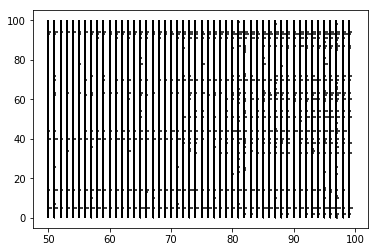

<Figure size 432x288 with 0 Axes>

In [26]:
for i in range(50,100):
    for j in range(100):
        plt.hlines(j,i*1,i*1+(float(sum_spikes[i][j]) / max_spikes))
        plt.vlines(i*1,0,100)
plt.show()
plt.savefig("spikes_sum.png")

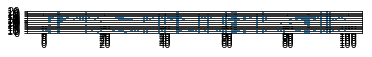

In [29]:
for i in range(90,100):
    plt.subplot(100,1,i+1)
    plt.bar(range(0,100),sum_spikes[i])
plt.show()

In [30]:
import h5py
f = h5py.File("../nest/HDF5_MNIST_TRAIN.h5", 'r')
img = f["img"][:]
label = f["label"][:]
f.close()

In [25]:
plt.show()
plt.savefig("spikes_sum.png")

<Figure size 432x288 with 0 Axes>

In [4]:
time_indices

[(0.006, 73),
 (0.0063, 54),
 (0.032799999999999996, 72),
 (0.0344, 63),
 (0.0363, 93),
 (0.0382, 62),
 (0.23290000000000002, 5),
 (0.24650000000000002, 94),
 (0.40220000000000006, 62),
 (0.403, 98),
 (0.4036, 24),
 (0.40390000000000004, 27),
 (0.4042, 49),
 (0.40430000000000005, 34),
 (0.4045, 92),
 (0.4045, 16),
 (0.4045, 17),
 (0.4047, 37),
 (0.40490000000000004, 9),
 (0.4066, 12),
 (0.41030000000000005, 75),
 (0.41040000000000004, 94),
 (0.4112, 58),
 (0.41130000000000005, 7),
 (0.41140000000000004, 96),
 (0.4116, 13),
 (0.41450000000000004, 71),
 (0.5227, 36),
 (0.6361, 99),
 (0.6366, 70),
 (0.6367, 82),
 (0.637, 63),
 (0.6374000000000001, 40),
 (0.6749, 40),
 (0.7447, 96),
 (0.7471000000000001, 39),
 (0.8365, 34),
 (0.8483, 10),
 (0.8544, 28),
 (0.8644000000000001, 42),
 (0.8697, 26),
 (0.8702000000000001, 14),
 (0.8702000000000001, 19),
 (0.8704000000000001, 65),
 (0.8704000000000001, 97),
 (0.8706, 49),
 (0.8706, 85),
 (0.8708, 7),
 (0.8709, 91),
 (0.8710000000000001, 30),
 (0.